> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

# 실습1

In [19]:

hard <- read.csv("hardwood.csv")
head(hard)


,x,y
,<dbl>,<dbl>
1,1.0,6.3
2,1.5,11.1
3,2.0,20.0
4,3.0,24.0
5,4.0,26.1
6,4.5,30.0


$y = β_0 + β_1x + ϵ$

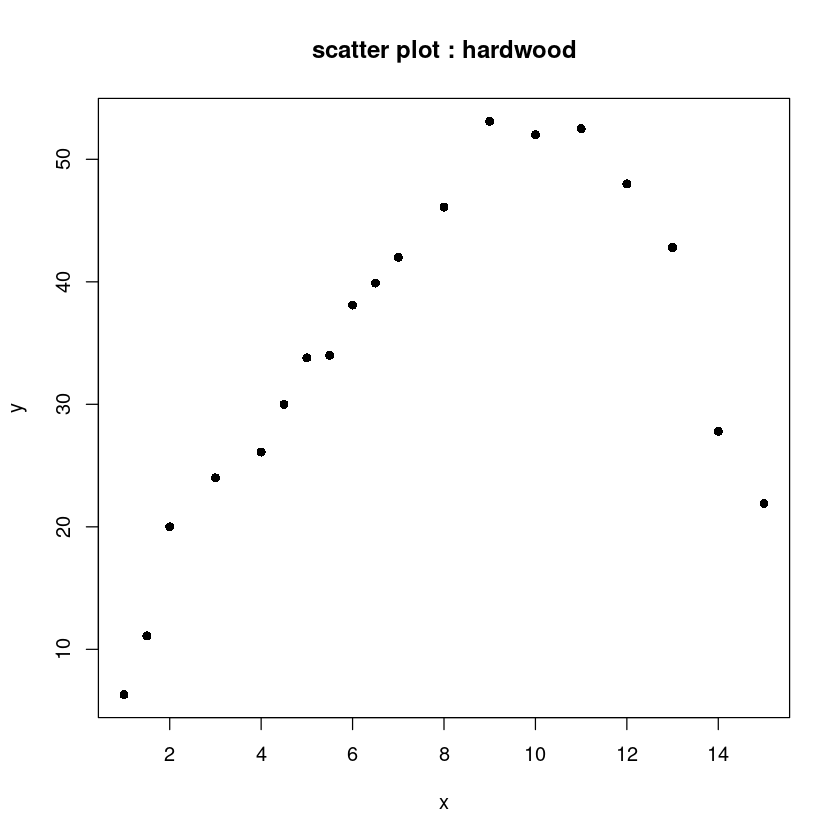

In [20]:
par(mfrow=c(1,1))
plot(y~x, hard, pch=16, main="scatter plot : hardwood")

$y = β_0 + β_1(x − \bar x) + ϵ$

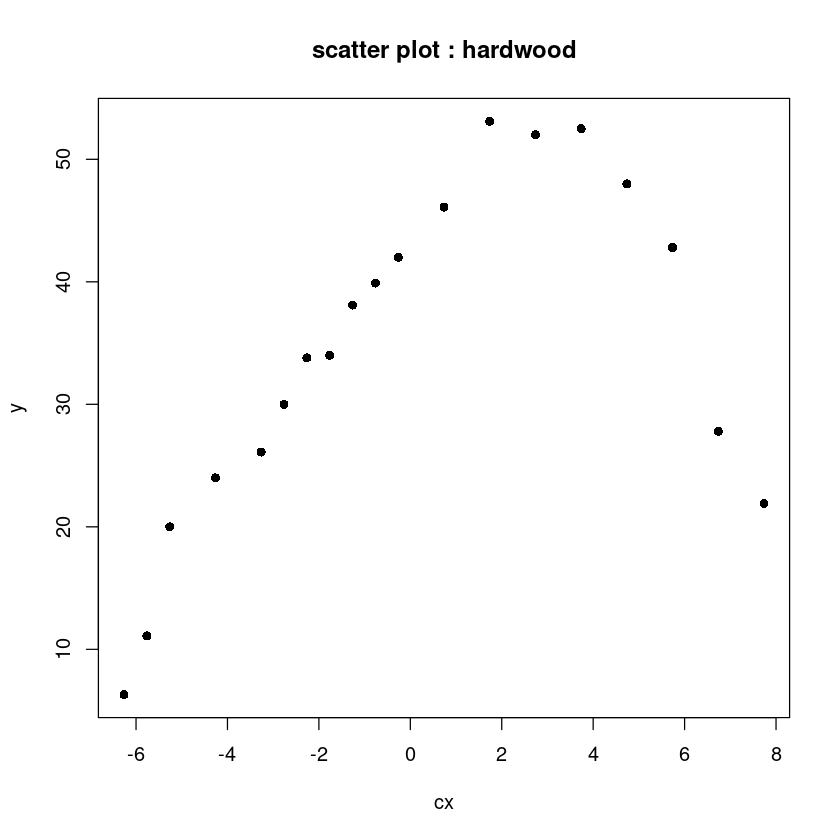

In [21]:
hard$cx <- hard$x - mean(hard$x)
plot(y~cx, hard, pch=16, main="scatter plot : hardwood")

In [22]:
hard_fit <- lm(y~x, hard)
summary(hard_fit)


Call:
lm(formula = y ~ x, data = hard)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.986  -3.749   2.938   7.675  15.840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  21.3213     5.4302   3.926  0.00109 **
x             1.7710     0.6478   2.734  0.01414 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.82 on 17 degrees of freedom
Multiple R-squared:  0.3054,	Adjusted R-squared:  0.2645 
F-statistic: 7.474 on 1 and 17 DF,  p-value: 0.01414


$y= \beta_0+\beta_1x + \beta_2 x^2 + \epsilon$

In [23]:
hard_fit_2 <- lm(y~x+I(x^2), hard)
summary(hard_fit_2)


Call:
lm(formula = y ~ x + I(x^2), data = hard)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8503 -3.2482 -0.7267  4.1350  6.5506 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.67419    3.39971  -1.963   0.0673 .  
x           11.76401    1.00278  11.731 2.85e-09 ***
I(x^2)      -0.63455    0.06179 -10.270 1.89e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.42 on 16 degrees of freedom
Multiple R-squared:  0.9085,	Adjusted R-squared:  0.8971 
F-statistic: 79.43 on 2 and 16 DF,  p-value: 4.912e-09


$y= \beta_0+\beta_1cx + \beta_2 cx^2 + \epsilon$

In [24]:
hard_fit_c_2 <- lm(y~cx+I(cx^2), hard)
summary(hard_fit_c_2)


Call:
lm(formula = y ~ cx + I(cx^2), data = hard)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8503 -3.2482 -0.7267  4.1350  6.5506 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 45.29497    1.48287   30.55 1.29e-15 ***
cx           2.54634    0.25384   10.03 2.63e-08 ***
I(cx^2)     -0.63455    0.06179  -10.27 1.89e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.42 on 16 degrees of freedom
Multiple R-squared:  0.9085,	Adjusted R-squared:  0.8971 
F-statistic: 79.43 on 2 and 16 DF,  p-value: 4.912e-09


- 모형의 적합도는 동일한 값이 나온다.

- 기울기가 조금 다르게 나온다.

- $\beta_2$는 동일하게 나오지만, $\beta_0,\beta_1$이 조금 다르게 나온다.

- standard error가 좀 다르게 나온다.

In [25]:
print(paste0("corr(x, x^2) = ", round(cor(hard$x, hard$x^2),3)))

[1] "corr(x, x^2) = 0.97"


In [27]:
print(paste0("corr(cx, cx^2) = ", round(cor(hard$cx, hard$cx^2),3)))

[1] "corr(cx, cx^2) = 0.297"


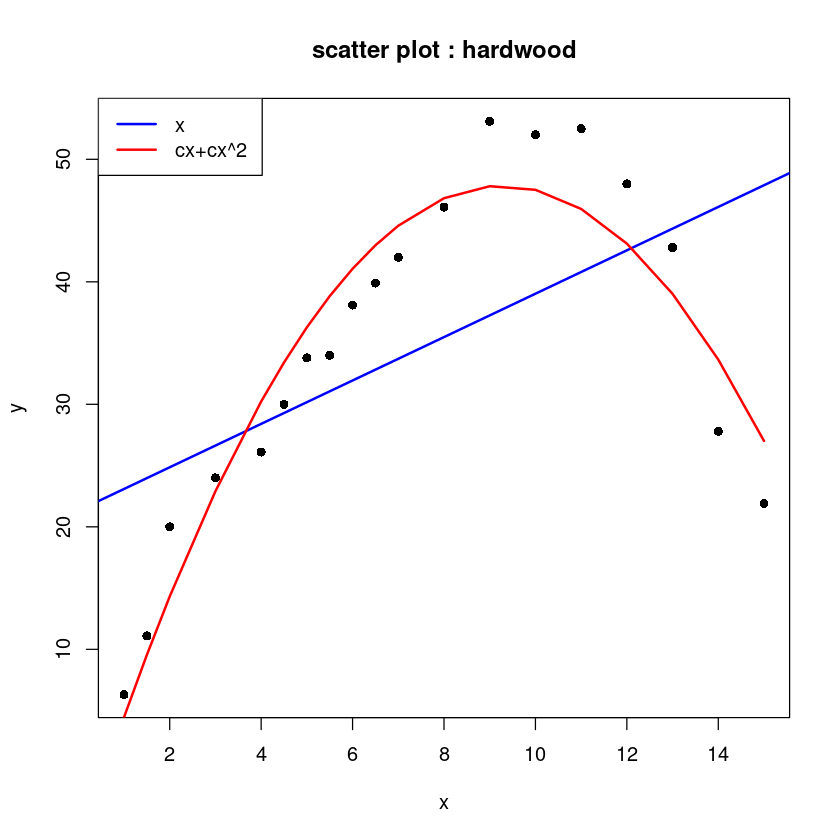

In [28]:
plot(y~x, hard, pch=16, main="scatter plot : hardwood")
abline(hard_fit, col='blue', lwd=2)
lines(hard$x, fitted(hard_fit_c_2),col='red', lwd=2)
legend("topleft", c("x","cx+cx^2"), col=c('blue','red'), lwd=2, lty=1)

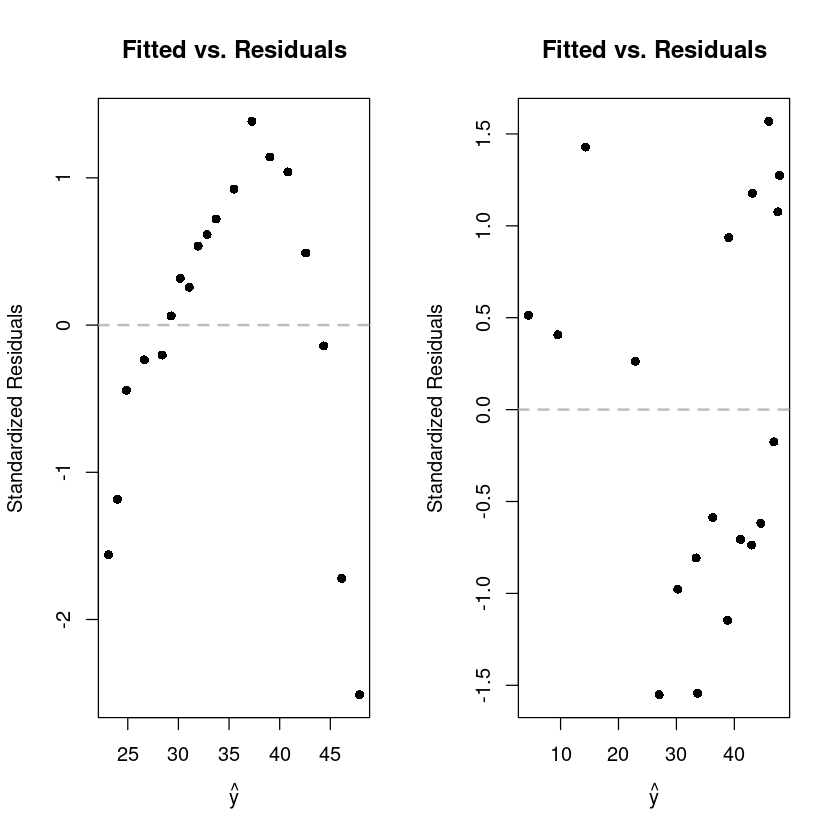

In [29]:
par(mfrow=c(1,2))
plot(fitted(hard_fit), rstandard(hard_fit), pch =16, 
     xlab = expression(hat(y)), 
     ylab = "Standardized Residuals", 
     main ="Fitted vs. Residuals")
abline(h =0, col ="grey", lwd =2, lty=2)

plot(fitted(hard_fit_c_2), rstandard(hard_fit_c_2), pch =16,
     xlab = expression(hat(y)),
     ylab = "Standardized Residuals",
     main = "Fitted vs. Residuals")
abline(h = 0, col ="grey", lwd =2, lty=2)

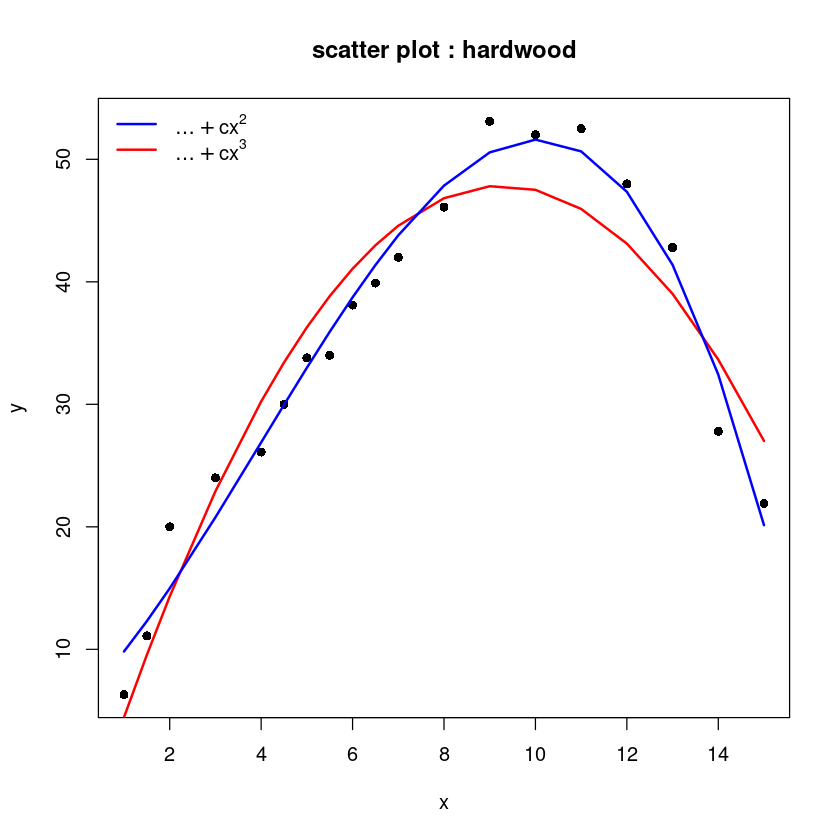

In [32]:
par(mfrow=c(1,1))
plot(y~x, hard, pch=16, main="scatter plot : hardwood")
lines(hard$x, fitted(hard_fit_c_2),col='red', lwd=2)
lines(hard$x, fitted(lm(y~cx+I(cx^2)+I(cx^3), hard)),col='blue', lwd=2) 
legend("topleft",c(expression(ldots+cx^2), 
            expression(ldots+cx^3)), col=c('blue', 'red'), lwd=2, lty=1, bty = "n")                  

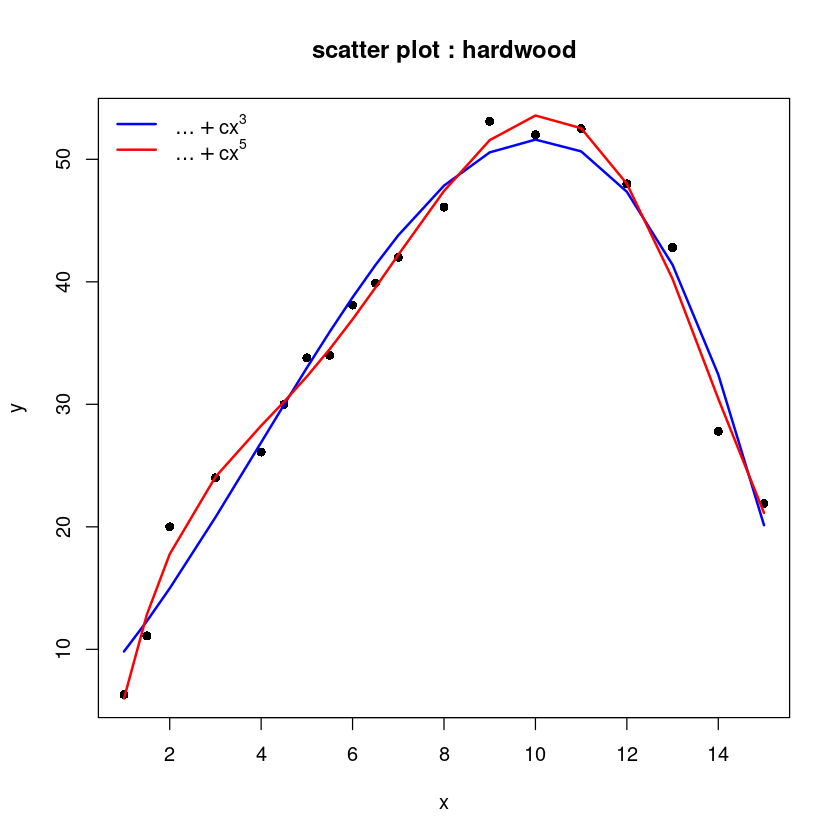

In [33]:
plot(y~x, hard, pch=16, main="scatter plot : hardwood")
lines(hard$x, fitted(lm(y~cx+I(cx^2)+I(cx^3), hard)),col='blue', lwd=2)
lines(hard$x, fitted(lm(y~cx+I(cx^2)+I(cx^3)+I(cx^4)+I(cx^5), hard)),col='red', lwd=2) 
legend("topleft", c(expression(ldots+cx^3), 
                    expression(ldots+cx^5)), col=c('blue', 'red'), lwd=2, lty=1, bty = "n")                                                                                       

- 5승 들어가면 잔차가 더 작아진다. -> 과적합

In [34]:
summary(lm(y~cx+I(cx^2)+I(cx^3)+I(cx^4)+I(cx^5), hard))


Call:
lm(formula = y ~ cx + I(cx^2) + I(cx^3) + I(cx^4) + I(cx^5), 
    data = hard)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.65167 -0.91159 -0.03811  0.96396  2.56865 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 43.6187788  0.7309210  59.676  < 2e-16 ***
cx           5.3479308  0.3896655  13.724 4.11e-09 ***
I(cx^2)     -0.1378567  0.1059263  -1.301 0.215700    
I(cx^3)     -0.1630817  0.0289147  -5.640 8.06e-05 ***
I(cx^4)     -0.0114448  0.0026525  -4.315 0.000840 ***
I(cx^5)      0.0021978  0.0005163   4.257 0.000935 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.703 on 13 degrees of freedom
Multiple R-squared:  0.989,	Adjusted R-squared:  0.9847 
F-statistic: 233.1 on 5 and 13 DF,  p-value: 3.022e-12


# 실습2

In [9]:
set.seed(12)
x <- seq(1,2,0.05) # 21개의 데이터
x2 <- x^2
y <- 3*x+1+4*x2 + rnorm(21)

- $y=1+3x+4x^2+N(0,1)$

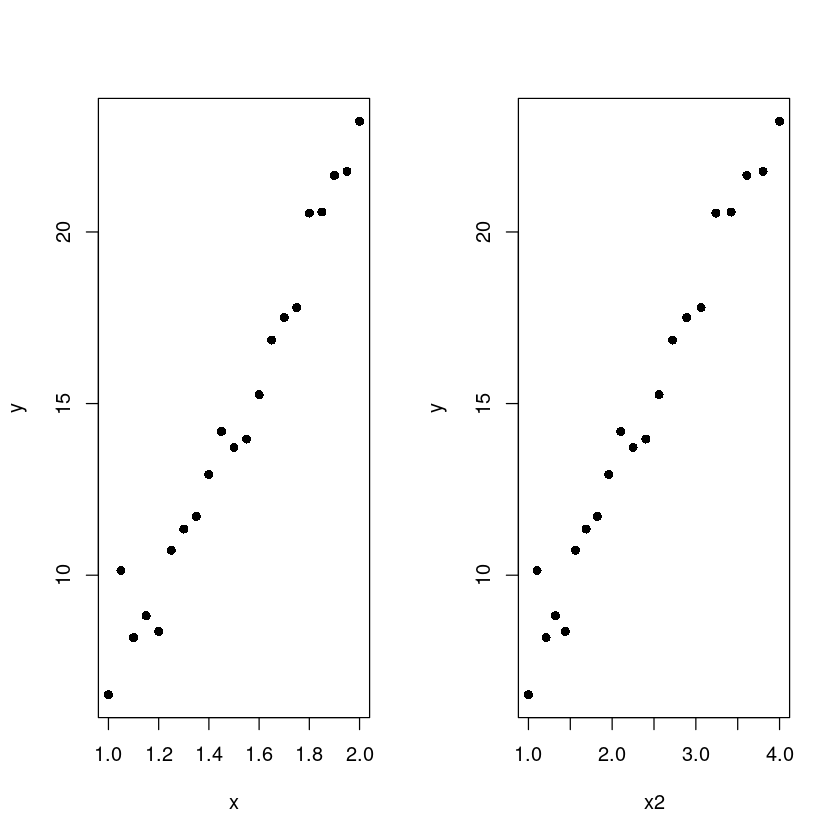

In [8]:
par(mfrow=c(1,2)) 
plot(x, y, pch=16) 
plot(x2,y, pch=16)

- 1~2까지의 X의 범위 일부분

- 커브는 보이지 않고 직선 형태로만 보인다.

In [10]:
cor(x,x2)

[1] 0.9959781

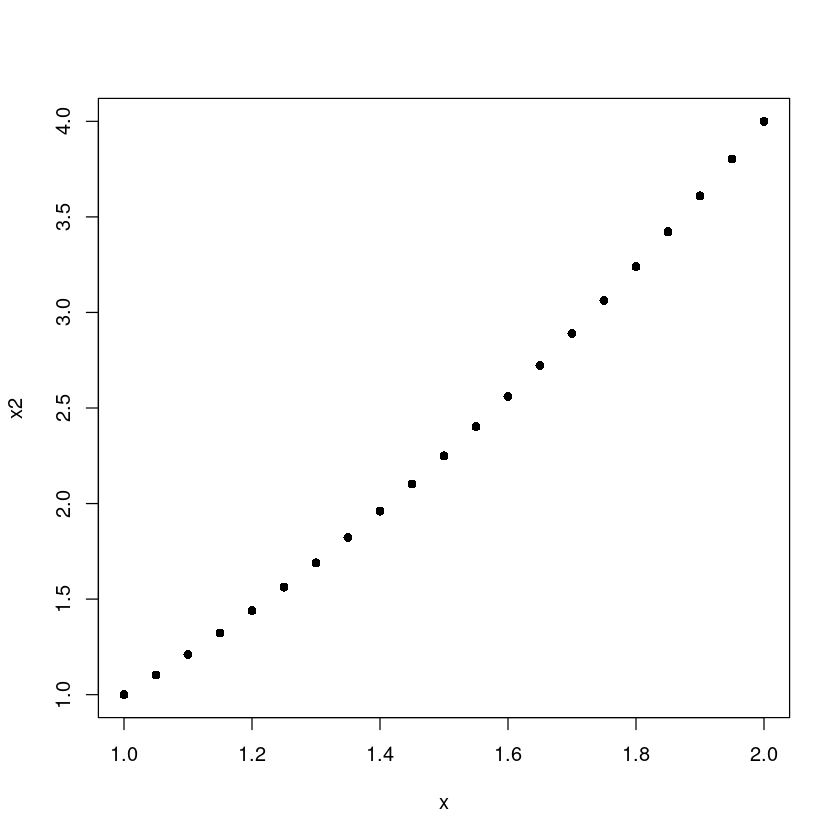

In [11]:
plot(x,x2,pch=16)

In [12]:
m <- lm(y~x+x2)
summary(m)


Call:
lm(formula = y ~ x + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40039 -0.44786 -0.07384  0.31824  2.14916 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   2.5112     4.8813   0.514   0.6132  
x            -0.5728     6.6908  -0.086   0.9327  
x2            5.5131     2.2213   2.482   0.0232 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8317 on 18 degrees of freedom
Multiple R-squared:  0.9755,	Adjusted R-squared:  0.9727 
F-statistic: 357.8 on 2 and 18 DF,  p-value: 3.226e-15


- $y=\beta_0+\beta_1x+\beta_2x^2+\epsilon$

- 모형자체는 유의하게 나오지만 x와 계수는 유의하지 않고, x2는 적게 나옴 -> 다중공산성

In [13]:
cx <- x-mean(x)
cx2 <- cx^2

In [14]:
cor(cx, cx2)

[1] 2.283527e-16

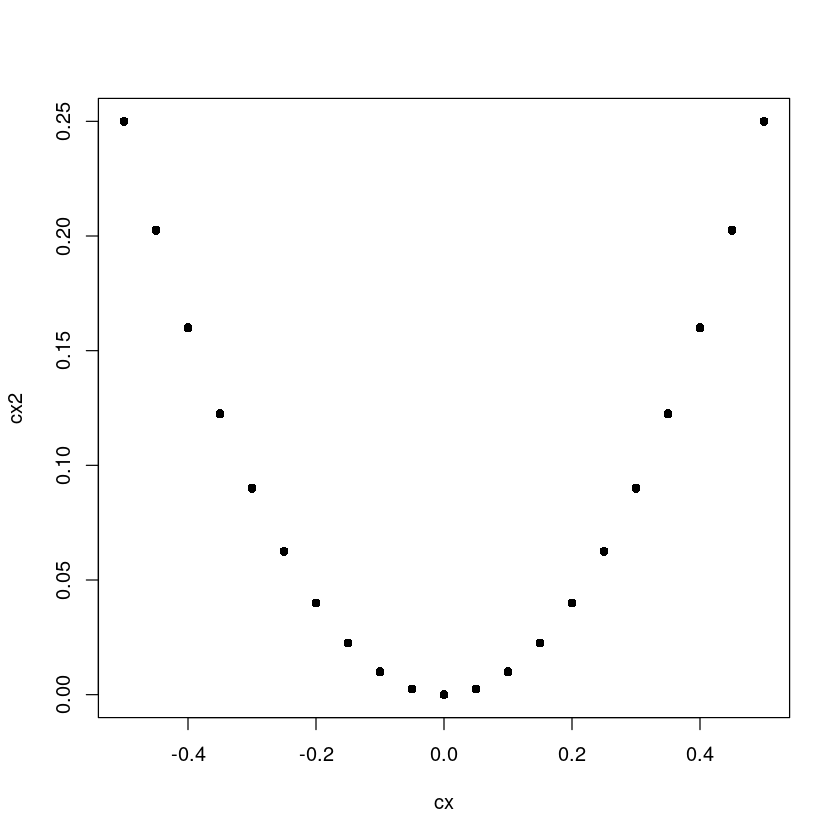

In [15]:
plot(cx,cx2, pch=16)

In [16]:
m2 <- lm(y~cx+I(cx^2))
summary(m2)


Call:
lm(formula = y ~ cx + I(cx^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40039 -0.44786 -0.07384  0.31824  2.14916 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.0565     0.2728  51.533  < 2e-16 ***
cx           15.9665     0.5995  26.634 6.53e-16 ***
I(cx^2)       5.5131     2.2213   2.482   0.0232 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8317 on 18 degrees of freedom
Multiple R-squared:  0.9755,	Adjusted R-squared:  0.9727 
F-statistic: 357.8 on 2 and 18 DF,  p-value: 3.226e-15


$y=\beta_0+\beta_1(x-\bar x) + \beta_2 (x-\bar x)^2 + \epsilon$

$\because x- \bar x = cx$

$lm(y$~$x+x$^$2)$ 이건 성립이 안된다. 

$lm(y$~ $x+I(x$^$2))$이렇게 써야해

$\hat \beta_2$는 위의 m1모형의 값과 같다.

$\hat \beta_1$과 $\hat \beta_0$은 m1모형의 값과 아주 다르다.

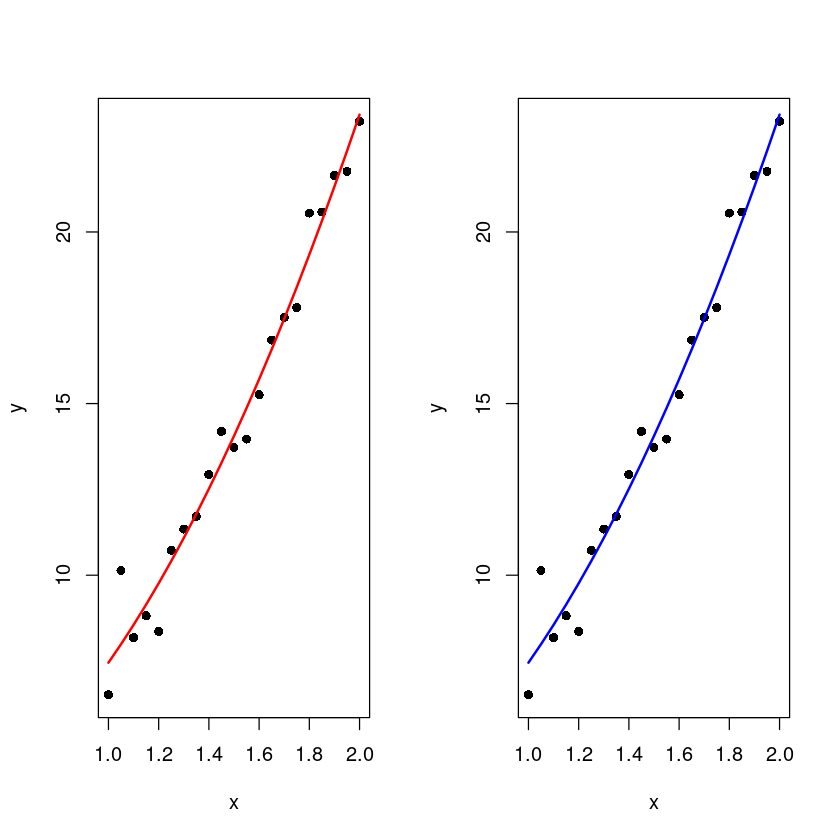

In [18]:
par(mfrow=c(1,2))
plot(x,y, pch=16)
lines(x, fitted(m), col='red', lwd=2) 
plot(x,y, pch=16)
lines(x, fitted(m2), col='blue', lwd=2)

$y=\beta_0+\beta_1(x_1 - \bar x) +\epsilon$

$= \beta_0+\beta_1x_1 - \beta_1 \bar x + \epsilon$

$=(\beta_0 - \beta_1 \bar x) +\beta_1 x_1 +\epsilon$

$= \beta^`_0 + \beta_1x_1 + \epsilon$

$y=\beta_0+\beta_1(x-\bar x)+\beta_2(x-\bar x)^2$

$=\beta_0+\beta_1x - \beta_1 \bar x + \beta_2 x^2 - 2x \bar x \beta + \beta_2 (\bar x)^2$

$=((\beta_0-\beta_1 \bar x) + \beta_2 (\bar x)^2)+ (\beta_1 - 2 \bar x \beta_2) x + \beta_2 x^2$

- 센터링을 하게 되면 회귀계수들의 다중공산성을 조금 제거할 수 있다.